# Support Vector Machine

Support Vector Machine is a supervised machine learning algorithm used for classification and regression problems. We plot each data item as a point in n-dimension space (n is the number of features) where value of each feature corresponds to value of each co-ordinate. To perform classification we try to find a hyper-plane which can differenciate between the two classes (using gradient descent). <br><br>
<img src="SVM.jpg" width="300" height="300"> <br><br>
### Hyper-Plane
A hyper-plane is a linear decision surface that splits the space into two parts i.e. it acts like a binary classifier. <br>
If our data has n dimentions (n features) then our hyper-plane is of (n-1) dimension.<br><br>
### Support Vectors
Support Vectors are the data points nearest to the hyperplane, the points of data set that, if removed, would alter the position of the dividing hyperplane. They are critical elements of a dataset which help us build our SVM.<br><br>

In [34]:
# for mathematical operations
import numpy as np
# for plotting of data
from matplotlib import pyplot as plt

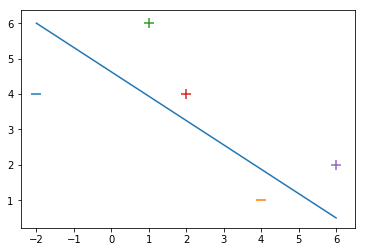

In [35]:
# Step 1 : Define data [X value, Y value, Bias value]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

# labels associated to data
Y = [-1,-1,1,1,1]

# plot data points with sample hyperplane
for d,sample in enumerate(X):
    # Plot the negative samples (first 2)
    if d<2:
        plt.scatter(sample[0],sample[1],s=120,marker='_',linewidths=2)
    # Plot the positive samples (last 3)
    else:
        plt.scatter(sample[0],sample[1],s=120,marker='+',linewidths=2)

# Print the possible hyperplane (just a naive guess)
plt.plot([-2,6],[6,0.5])


### Loss or Error Function (to minimize)
In SVM we will use Hinge Loss. This loss function is used for training classifiers. It is used for 'maximun margin' classification and hence in SVM.<br><br>
$ \,\,\,\, c(x, y, f(x)) = (1 - y * f(x))_+ $<br><br>
where c is the loss function, x is the sample, y is the true label, f(x) is the predicted label.<br>
(The value of $y*f(x)$ is greater than or equal to 1 always else the value of loss function is 0 as the result is always positive.)<br><br>
### Objective function (to optimize)
The objective of an SVM consists of two terms. The first term is a regularizer (which is the heart of the SVM) and the second term is the loss (or the total loss).<br> The regularizer keeps a balance between the margin maximization and the loss. If the regularizer is too high, it may result in overfitting of data and if it is too low, it may result in underfitting.<br>
The main objective is to find a decision surface which is maximally far away from any data points.<br><br>
$ \,\,\,\, min_w \lambda \,\, {||\, w \,||}^2 + \sum_{i=1}^n (1 - y_i \langle x_i,w \rangle)_+ $<br><br>
#### How to minimize the loss / optimize the objective function ?
This can be done using gradient descent. <br><br>
$\,\,\,\, \frac{\partial }{\partial w_k} \, \lambda \,\, {||\, w \,||}^2 = 2\lambda w_k $<br>
$\,\,\,\, \frac{\partial }{\partial w_k} \, (1 - y_i \langle x_i,w \rangle)_+ = -y_i x_{ik} $
$\,\,\,\,$ if $ y_i \langle x_i,w \rangle < 1 $ $\,\,\,$ else its value is 0<br><br>
This means that if we have a misclassified sample (non zero value of gradient of loss term), we update the weight vector w using gradients of both terms, else if classified correctly (zero value of gradient of loss term), we update w by gradient of regularizer.<br><br>
Misclassification condition : $\,\,\, y_i \langle x_i,w \rangle < 1 $<br>
Update rule for weights (misclassified) : $\,\,\, w = w + \eta (y_i x_i - 2\lambda w)$<br><br>
Correct classification condition : $\,\,\, y_i \langle x_i,w \rangle \geq 1 $<br>
Update rule for weights (correctly classified) : $\,\,\, w = w + \eta ( - 2\lambda w)$<br><br>
where $\eta$ is the learning rate and $\lambda$ is the regularizer. (Learning rate is the number of steps the algorithm takes down the gradient on the error curve. It should neither be too high nor too low. The regularizing parameter is taken as 1/epochs, which will decrease as the number of epochs increases. )<br><br>

In [36]:
# Stochastic gradient descent to learn the separating hyperplane

def svm_sgd_plot(X, Y):
    # initialize the weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    # list to store misclassifications so we can see change in occurance of error over time
    errors = []
    
    # gradient descent part (training the model)
    for epoch in range(1,epochs):
        error = 0
        for i,x in enumerate(X):
            # for misclassification
            if (Y[i]*np.dot(X[i],w)) < 1 :
                # misclassified update for weights
                w = w + eta * ( (X[i]*Y[i]) + (-2*(1/epoch)*w) )
                error = 1
            else :
                # correct classification update for weights
                w = w + eta * (-2*(1/epoch)*w)
        errors.append(error)
        
    # plot for rate of occurance of error
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.xlabel('Epochs')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

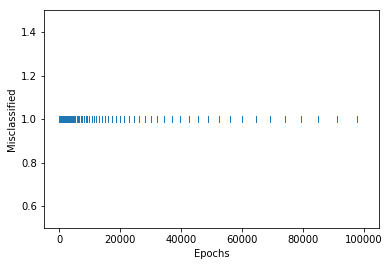

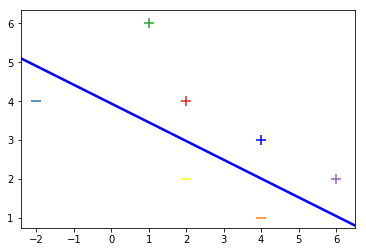

In [37]:
w = svm_sgd_plot(X,Y)

for d,sample in enumerate(X):
    # Plot the negative samples (first 2)
    if d<2:
        plt.scatter(sample[0],sample[1],s=120,marker='_',linewidths=2)
    # Plot the positive samples (last 3)
    else:
        plt.scatter(sample[0],sample[1],s=120,marker='+',linewidths=2)

# Add the test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# print the hyperplane calculated by svm_sgd()
x2 = [w[0],w[1],-w[1],w[0]]
x3 = [w[0],w[1],w[1],-w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1,color='blue')